#### 統計検定2級 学習資料

公式サイトの出題範囲表の用語と関連事項をまとめる。

----

## 4. データの活用


### 4.2. 時系列データの処理

ねらい：時系列データのグラフ化や分析方法を理解する。

----

#### 項目（学習しておくべき用語）

|番号|項目|alias|
|:---:|:---:|:---:|
|ch4_2-1|指数化|indexation|
|ch4_2-2|幾何平均|geometric mean|
|ch4_2-3|成長率|a growth rate（伸び率）|
|ch4_2-4|トレンド|trend（傾向）|
|ch4_2-5|平準化|leveling|
|ch4_2-6|系列相関|autocorrelation（自己相関）|
|ch4_2-7|コレログラム|correlogram|

----

#### ch4_2-1 指数化
#### ch4_2-2 幾何平均
#### ch4_2-3 成長率

時系列データ（time series data）とは、時間順に得られたデータであり、  
折れ線グラフなどで表される。

----

時系列データについて説明するために、  
日本の所定内給与額の推移<昭和51年〜平成29年>で説明する。

情報元は[リンク][kyuyo]

[kyuyo]: https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00450091&tstat=000001011429&cycle=0&tclass1=000001020466&tclass2=000001020468

In [1]:
# importする
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 以下のインライン展開のコードを走らせないとmatplotlibのグラフ表示ができない場合がある
%matplotlib inline

**指数化**とは、時系列間の値を揃えるために、ある時点を基準時とすること。

In [2]:
# 時系列情報を収集してみる
# スクレイピングで気象庁の気温情報を取得する
# スクレイピングのルールは、https://qiita.com/nezuq/items/c5e827e1827e7cb29011
# クローラはめんどくさいので使わない

from bs4 import BeautifulSoup
import requests
import datetime

urlbase='http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s1.php?'

# 1980年から2017年までの気温情報を取得する
table = []
for i in range(1980, 2018):
    params="prec_no=44&block_no=47662&year="+str(i)+"&month=&day=&view="
    url=urlbase+params

    result = requests.get(url)
    cont = result.content

    soup = BeautifulSoup(cont, 'lxml')
    a = soup.select("table > .mtx")
    
    arr2 = []
    for j in a:
        td = j.find_all('td')
        arrtd = []
        for k in td:
            arrtd.append(k.text)
           
        if arrtd:
            arr2 = [datetime.date(int(i),int(arrtd[0].replace(')','')),1), 
                            float(arrtd[7].replace(')','')), 
                            float(arrtd[8].replace(')','')), 
                            float(arrtd[9].replace(')',''))]
            table.append(arr2)  

mycol=['date','ave_t','max_t','min_t']
df=pd.DataFrame(table,columns=mycol)
df.index = df['date']
df.to_csv('kishocho_temp_time_series.csv')
df.head(5)

,date,ave_t,max_t,min_t
date,,,,
1980-01-01,1980-01-01,5.6,10.0,1.7
1980-02-01,1980-02-01,5.2,9.2,1.3
1980-03-01,1980-03-01,8.2,12.0,4.9
1980-04-01,1980-04-01,13.6,17.6,9.9
1980-05-01,1980-05-01,19.2,23.4,15.2


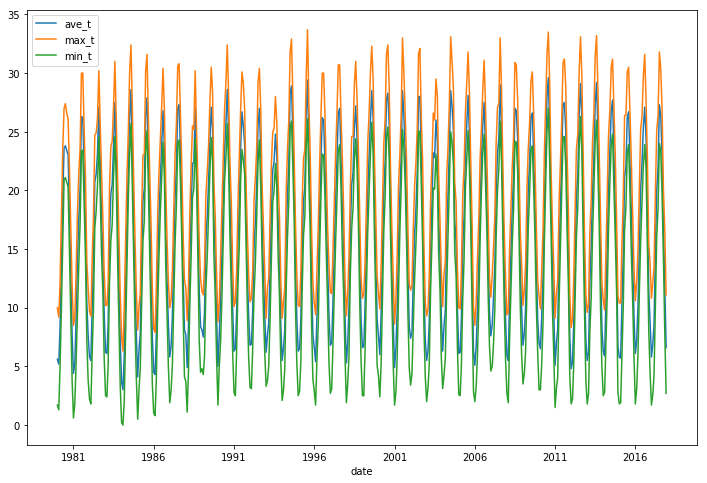

In [3]:
# 折れ線グラフ
df.plot(x='date', figsize=(12,8))

In [4]:
# 指数化
# 平成元年1月平均気温を基準とする
df['idx_ave_t'] = df['ave_t']/df.iloc[108,1]
df['idx_max_t'] = df['max_t']/df.iloc[108,1]
df['idx_min_t'] = df['min_t']/df.iloc[108,1]
df.head(10)

,date,ave_t,max_t,min_t,idx_ave_t,idx_max_t,idx_min_t
date,,,,,,,
1980-01-01,1980-01-01,5.6,10.0,1.7,0.691358,1.234568,0.209877
1980-02-01,1980-02-01,5.2,9.2,1.3,0.641975,1.135802,0.160494
1980-03-01,1980-03-01,8.2,12.0,4.9,1.012346,1.481481,0.604938
1980-04-01,1980-04-01,13.6,17.6,9.9,1.679012,2.172840,1.222222
1980-05-01,1980-05-01,19.2,23.4,15.2,2.370370,2.888889,1.876543
1980-06-01,1980-06-01,23.6,27.0,20.9,2.913580,3.333333,2.580247
1980-07-01,1980-07-01,23.8,27.4,21.1,2.938272,3.382716,2.604938
1980-08-01,1980-08-01,23.4,26.6,20.7,2.888889,3.283951,2.555556
1980-09-01,1980-09-01,23.0,26.1,20.3,2.839506,3.222222,2.506173


In [5]:
df_idx = df.loc[:,['idx_ave_t', 'idx_max_t', 'idx_min_t']]
df_idx.head(5)

,idx_ave_t,idx_max_t,idx_min_t
date,,,
1980-01-01,0.691358,1.234568,0.209877
1980-02-01,0.641975,1.135802,0.160494
1980-03-01,1.012346,1.481481,0.604938
1980-04-01,1.679012,2.172840,1.222222
1980-05-01,2.370370,2.888889,1.876543


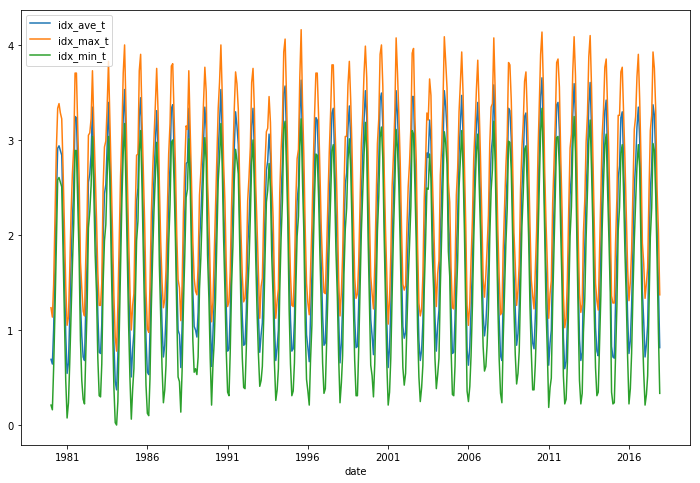

In [6]:
df_idx.plot(figsize=(12,8))

In [7]:
#ここからはave_tのみ扱う
dfave = df_idx.loc[:,['idx_ave_t']]
dfave.head(5)

,idx_ave_t
date,
1980-01-01,0.691358
1980-02-01,0.641975
1980-03-01,1.012346
1980-04-01,1.679012
1980-05-01,2.370370


**伸び率**とは前期比(1行前の観測値)を表す。  
観測値をy0からyTとすると伸び率は、

$$
\begin{align}
r_{t} = \frac{y_{t}}{y_{t-1}}
\end{align}
$$

In [8]:
# idx_ave_tを1行下にずらしてyt-1を作る
a = dfave['idx_ave_t'].as_matrix()
b = np.insert(a, 0, 10000000000000)
c = np.delete(b,b.shape[0]-1)

grate = a/c

dfave['grate'] = grate
dfave.head(5)

,idx_ave_t,grate
date,,
1980-01-01,0.691358,6.913580e-14
1980-02-01,0.641975,9.285714e-01
1980-03-01,1.012346,1.576923e+00
1980-04-01,1.679012,1.658537e+00
1980-05-01,2.370370,1.411765e+00


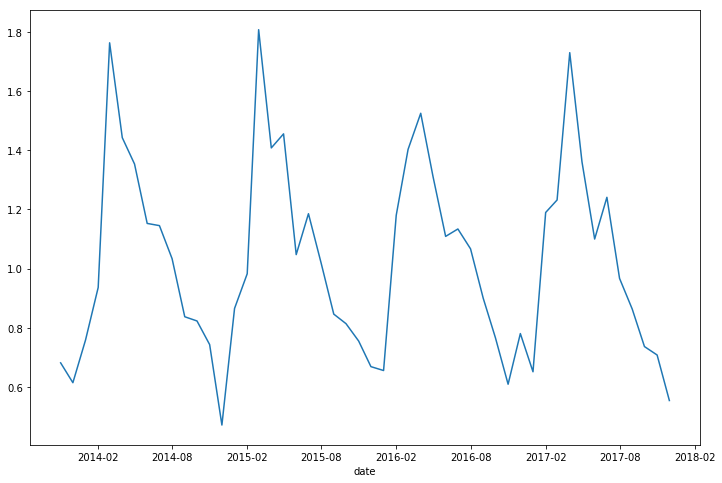

In [9]:
dfave['grate'].tail(50).plot(figsize=(12,8))

**幾何平均**とは期間Tでの平均伸び率である。

$$
\begin{align}
r_{G} = (r_1 \times r_2 \times ... r_{T-1} \times r_T)^{\frac{1}{T}} = (\varPi _{t=1} ^{T} {r_t}) ^ {\frac{1}{T}}
\end{align}
$$

In [10]:
# 幾何平均
# ひと月当たりの平均伸び率は1.00036
a = (np.delete(grate,0).prod(axis=0))
b = (1/(grate.shape[0]-1))
pow(a, float(b))

1.0003611708137119

----

#### ch4_2-4 トレンド
#### ch4_2-5 平準化

時系列データの時間的変動を3種類に分ける伝統的な考え方があり、  
それぞれ**傾向（トレンド）変動（TC）、季節変動（S）、不規則変動（I）**にわけられる。  

傾向変動：基本的な長期に渡る動きを表す変動  
季節変動：1年を周期として循環を繰り返す変動  
不規則変動：上記以外の変動  
（上記以外にも変動を分けることがある）

----

$$
\begin{align}
y_t = TC_t + S_t + I_t
\end{align}
$$

傾向を抽出する方法として移動平均法や指数平滑法などがある。  

**移動平均法**とは、ある時点tにおける傾向変動の値を、  
その時点のk時点前からk時点後までの値の平均値とする方法である。  
変動から雑音的な成分を取り除くので**平滑化**とも呼ばれる。

**指数平滑化**は、時点に対して新しいものほどウェイトをかけて移動平均を算出する加重平均法の1つ。

移動平均の式（1.7.3）：
時点tでの値とk時点前からk時点後までの2k+1個の値を用いて求められる時点tでの値は、

$$
\begin{align}
\hat{TC_t} = \sum _{s=t-k} ^{t+k} {\frac{y_s}{2k+1}}
\end{align}
$$

2k+1項の時点を用いてるので(2k+1)項移動平均と呼ぶ。  
12ヶ月で循環する偶数の項の場合は上記の式に当てはまらないので以下のようにする。

$$
\begin{align}
\hat{TC_t} = \frac{ \frac{y_{t-6}}{2} + y_{t-5} + \cdots + y_{t+5} + \frac{y_{t+6}}{2} }{12}
\end{align}
$$

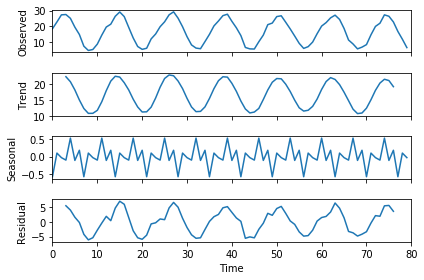

In [27]:
# 時系列データの分解を行う。
# Observed=yt
# Trend=TCt
# Seasonal=St
# Residual=It
# http://www.statsmodels.org/stable/index.html

from statsmodels.tsa.seasonal import seasonal_decompose
ts = seasonal_decompose(df['ave_t'].tail(80).values, freq=7)
ts.plot()
plt.show()

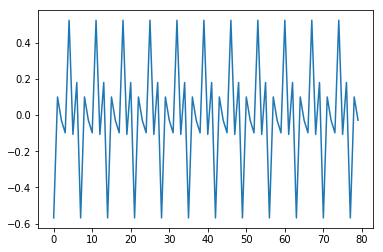

In [28]:
plt.plot(ts.seasonal)

----

#### ch4_2-6 系列相関
#### ch4_2-7 コレログラム

時系列データでは、周期を取り扱うので同じ時系列の時点をずらした時系列との相関が重要となる。  
もとの時系列と時点をh（**ラグ**）だけずらした時系列を別の変数とみなして2変数間の相関係数を求め、  
それをhの関数とみなしたものを**自己（系列）相関関数**という。  

横軸にラグhを取り、自己相関係数を縦軸に示したグラフを**コレログラム**という。

----

自己共分散関数の式（1.7.4）:

$$
\begin{align}
C_h = \frac{1}{T} \sum _{t=1} ^{T-h} {(y_t - \bar{y})(y_{t+h} - \bar{y})}
\end{align}
$$

自己相関係数の式（1.7.5）:  
  
C0は{yt}のラグ0の時の共分散

$$
\begin{align}
r_h = \frac{C_h}{C_0}
\end{align}
$$

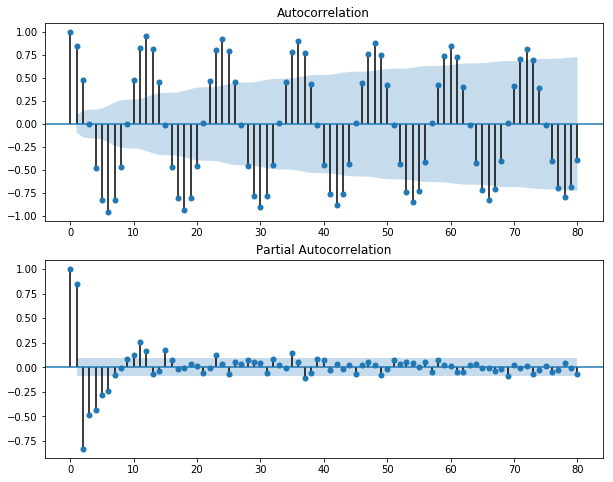

In [29]:
# コレログラムの描画
import statsmodels.tsa.stattools as stt

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['ave_t'], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['ave_t'], lags=80, ax=ax2)

### 参考

参考1: 日本統計学会 編. 改訂版 日本統計学会公式認定 統計検定2級対応 統計学基礎. 東京図書, 2015, 272p  
参考2: 日本統計学会."統計検定2級出題範囲表".http://www.toukei-kentei.jp/wp-content/uploads/grade2_hani_170727.pdf 、(参照2018-02-05).


*Revision:001 2018/02/24 init*